In [25]:
import pandas as pd
import mne
import numpy as np
from mne.preprocessing import ICA
from mne.time_frequency import tfr_morlet
# Load EEG data from CSV
data_file = r'E:\EEG_Neurofeedback\data\20240511_05\eegraw_20240511_214051_final.csv'
eeg_data = pd.read_csv(data_file)

eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 
                'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Filtering the data to include only EEG channels
eeg_data_filtered = eeg_data[eeg_channels]

# Transpose the data to fit MNE structure: channels × samples
data_transposed = eeg_data_filtered.transpose().values

# Define sampling frequency
sfreq = 1000  

# Create an MNE Info object, specifying channel types and sampling frequency
info = mne.create_info(ch_names=eeg_channels, sfreq=sfreq, ch_types='eeg')

# Create the Raw object using the data and the info structure
raw = mne.io.RawArray(data_transposed, info)

# Applying the standard 10-20 montage to add electrode locations
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)



Creating RawArray with float64 data, n_channels=32, n_times=178528
    Range : 0 ... 178527 =      0.000 ...   178.527 secs
Ready.


<RawArray | 32 x 178528 (178.5 s), ~43.6 MB, data loaded>

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 1000.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 64 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 64.00 Hz
- Upper transition bandwidth: 16.00 Hz (-6 dB cutoff frequency: 72.00 Hz)
- Filter length: 207 samples (0.207 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished


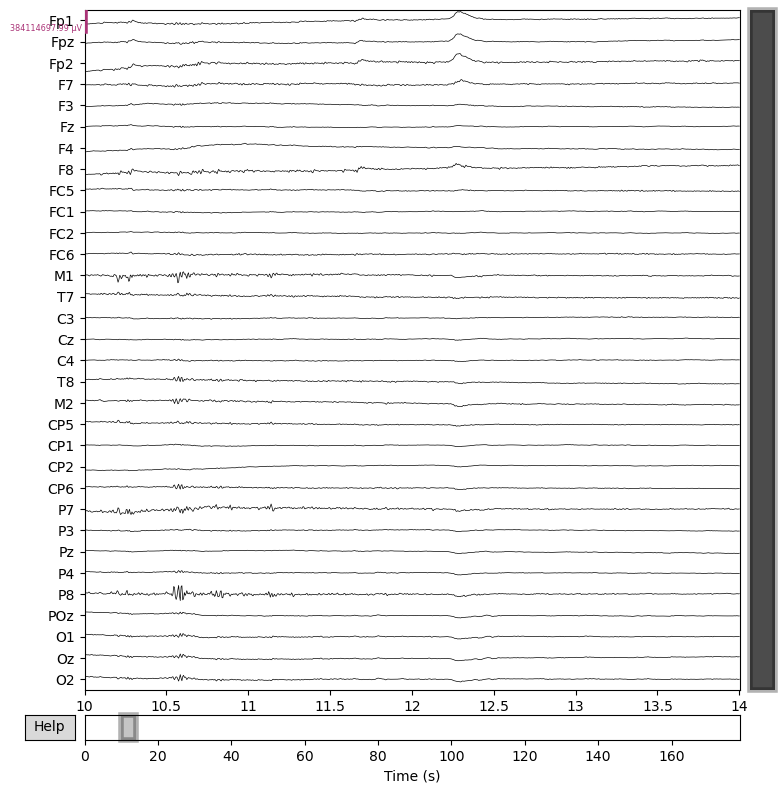

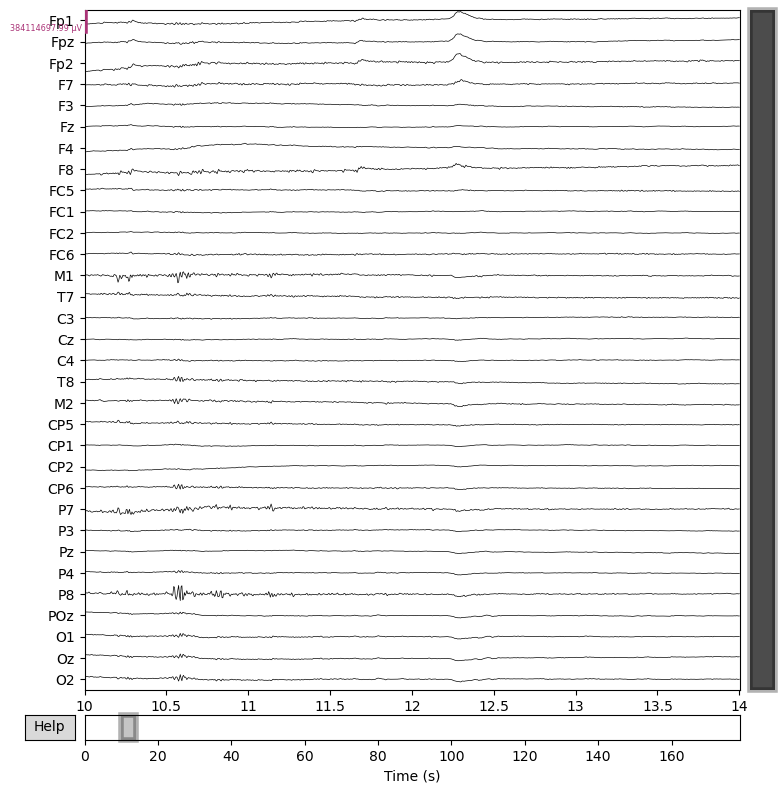

In [26]:
# Displaying the information and plotting the data
print(raw.info)
raw.filter(None, 64.0, fir_design='firwin')
raw.plot(n_channels=32, start=10,duration=4,scalings='auto')  # Modify duration as needed for better visualization


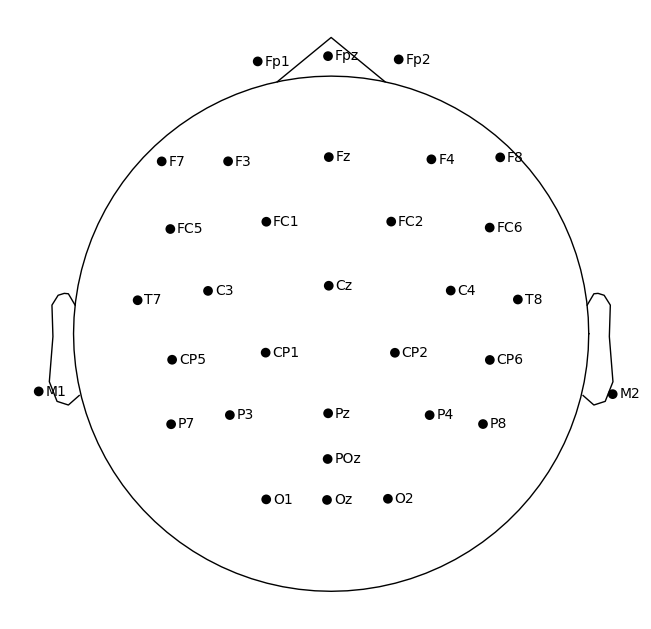

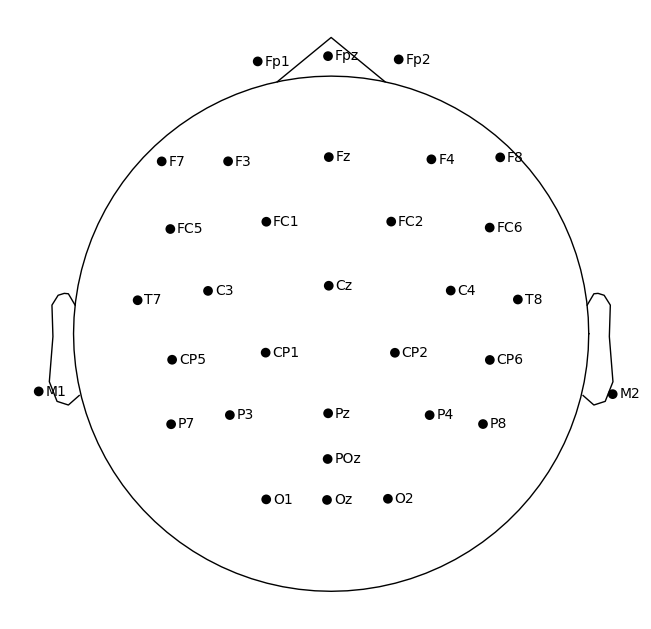

In [27]:
raw.plot_sensors(ch_type='eeg', show_names=True)


In [28]:
raw = raw.notch_filter(freqs=(50))

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


C:\Users\57139\AppData\Local\Temp\ipykernel_30248\199558726.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(average=True,fmax=64,n_fft=16000)
D:\anaconda3\lib\site-packages\mne\viz\utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


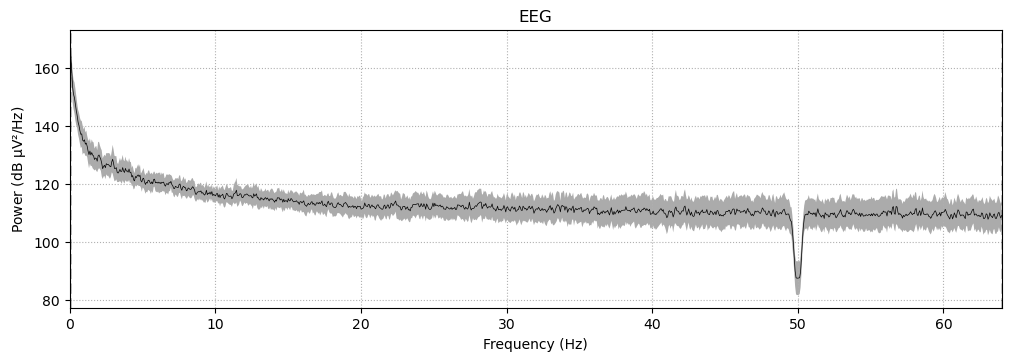

In [29]:
raw.plot_psd(average=True,fmax=64,n_fft=16000)

In [30]:
raw = raw.filter(l_freq=0.1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


C:\Users\57139\AppData\Local\Temp\ipykernel_30248\3029373584.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(average=True,fmax=40,n_fft=16000)
D:\anaconda3\lib\site-packages\mne\viz\utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


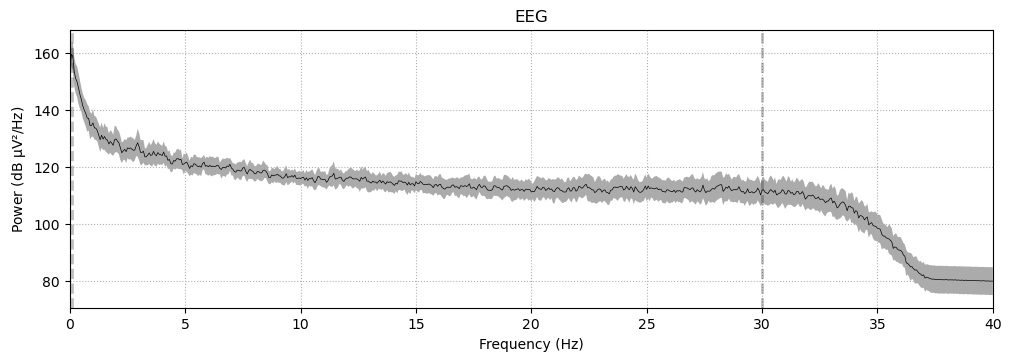

In [17]:
raw.plot_psd(average=True,fmax=40,n_fft=16000)

In [61]:
ica = ICA(max_iter='auto')
raw_for_ica = raw.copy().filter(l_freq=1, h_freq=None)
ica.fit(raw_for_ica)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)

Fitting ICA to data using 32 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished


Selecting by non-zero PCA components: 30 components
Fitting ICA took 5.8s.


<ICA | raw data decomposition, method: fastica (fit in 79 iterations on 178528 samples), 30 ICA components (32 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=31, n_times=178528
    Range : 0 ... 178527 =      0.000 ...   178.527 secs
Ready.


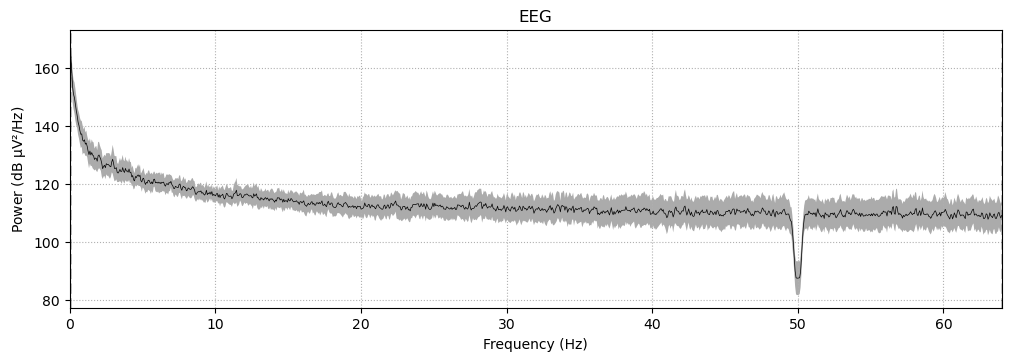

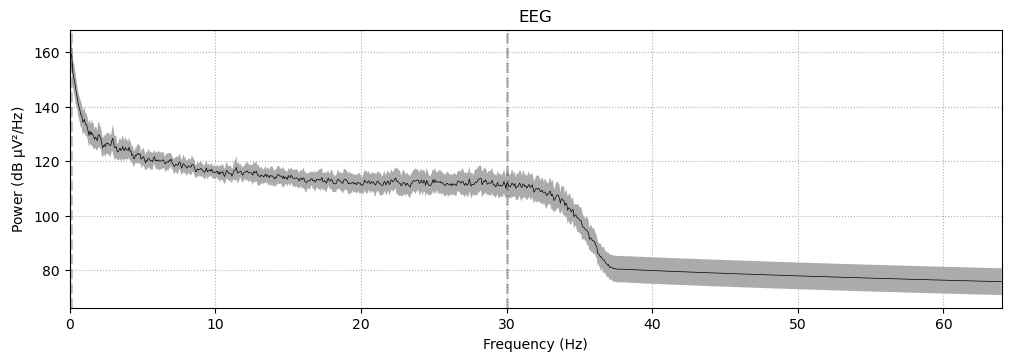

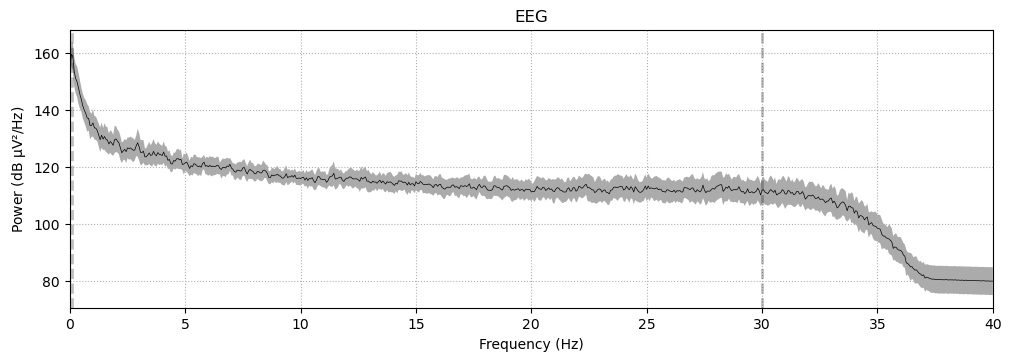

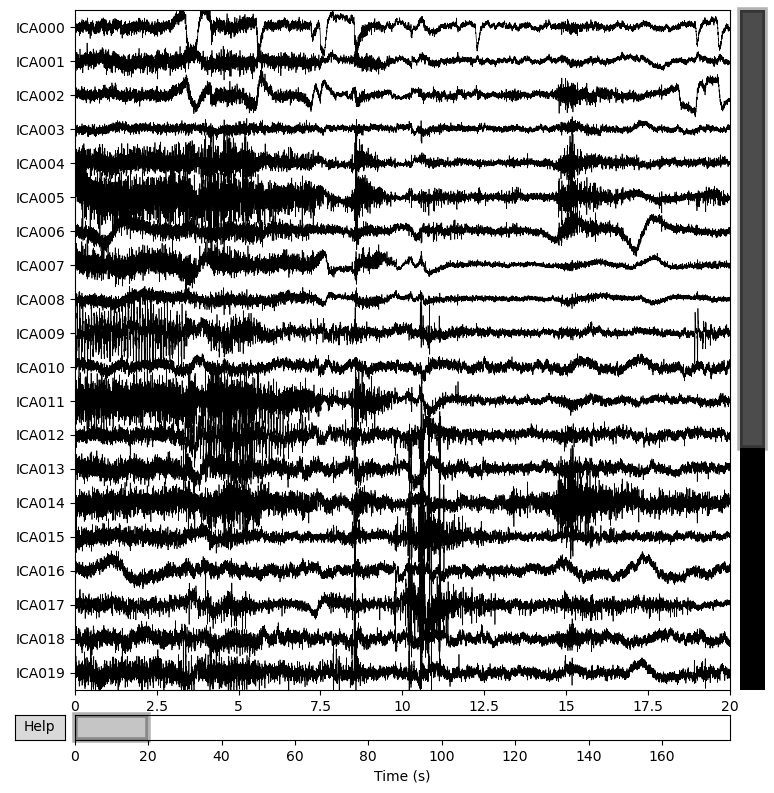

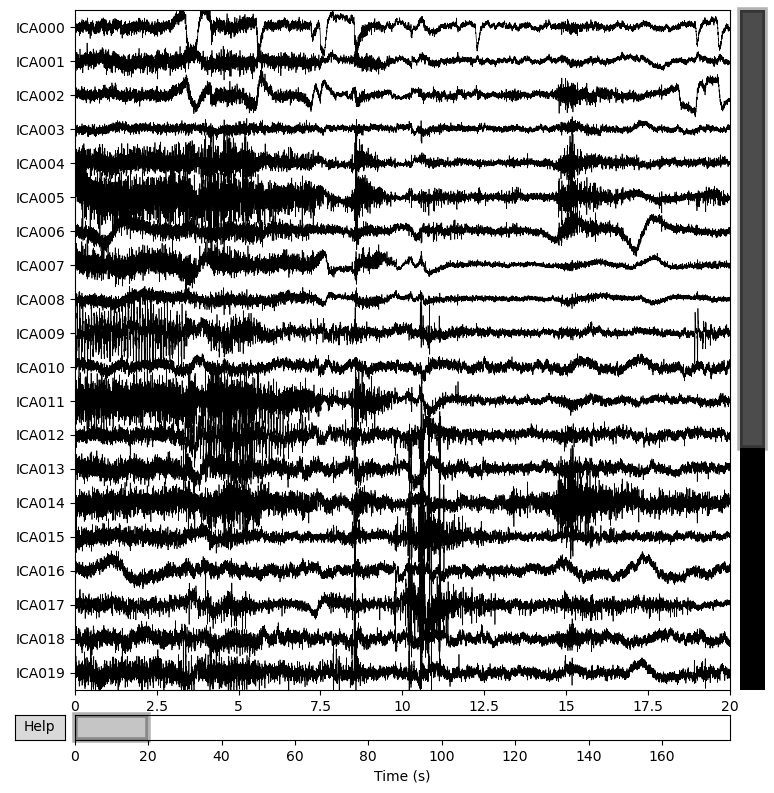

In [22]:
ica.plot_sources(raw_for_ica)

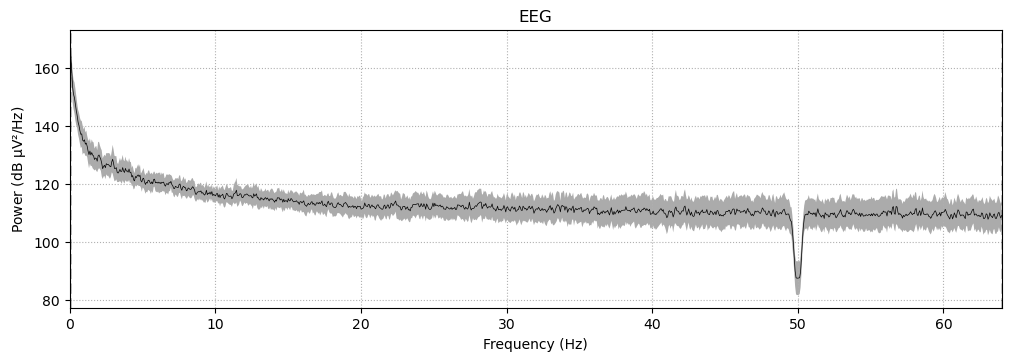

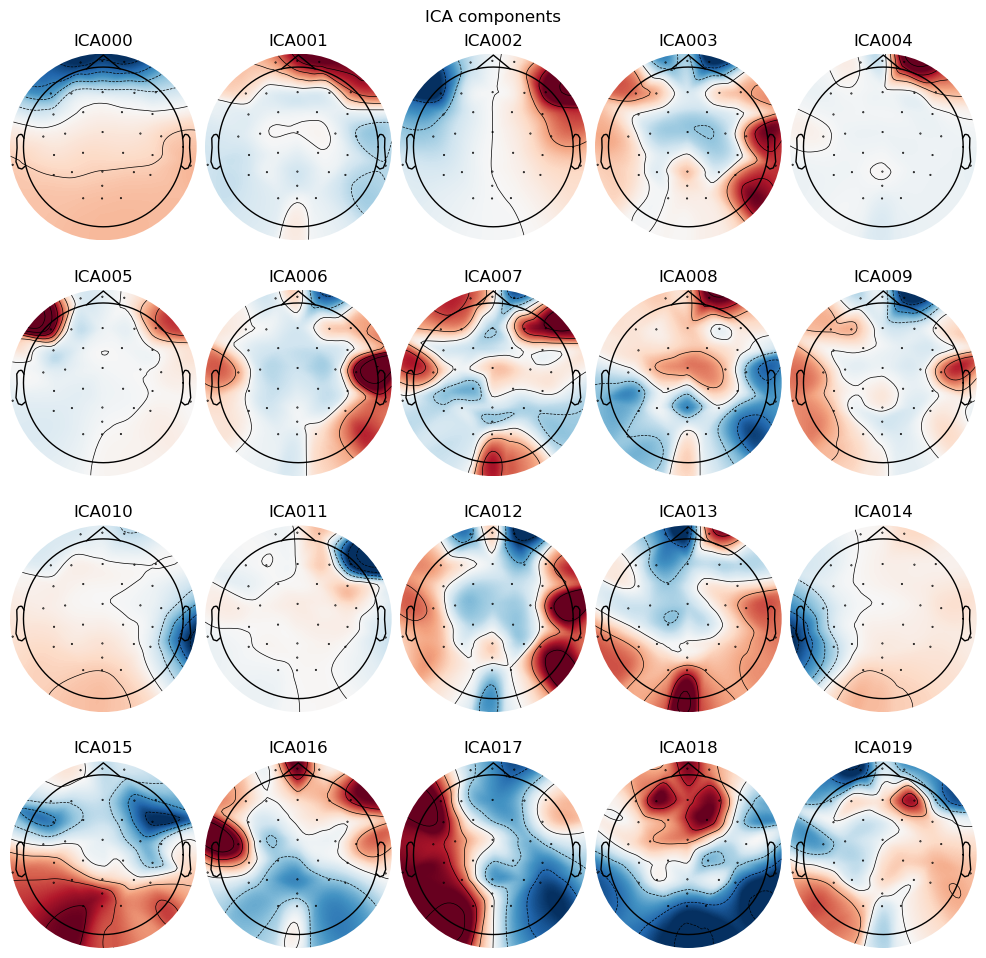

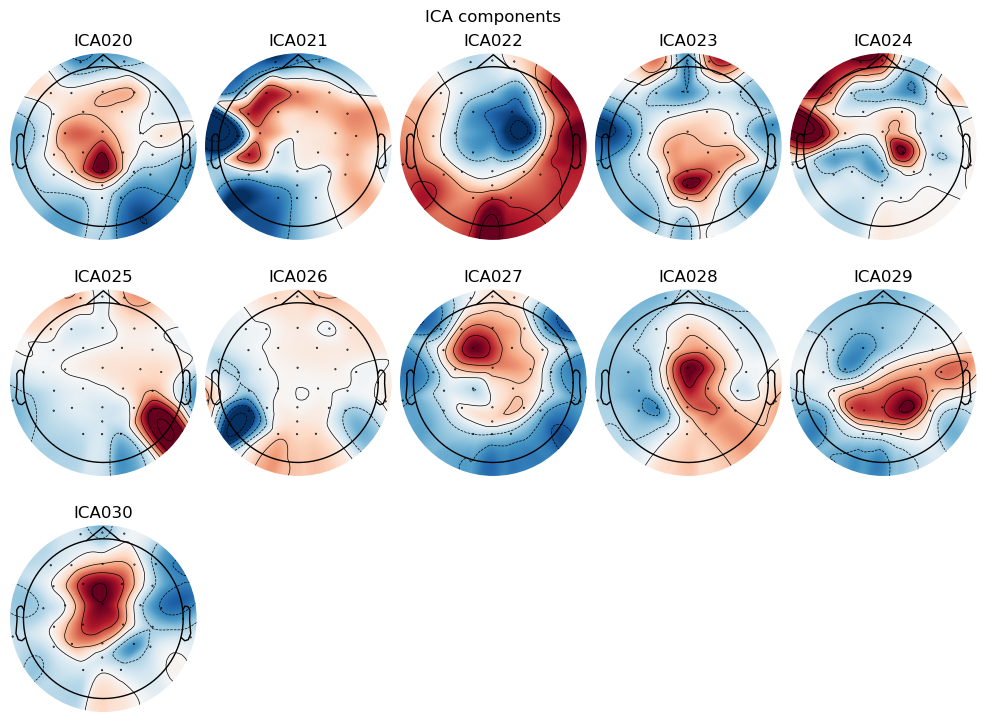

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x731.5 with 11 Axes>]

In [32]:
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated


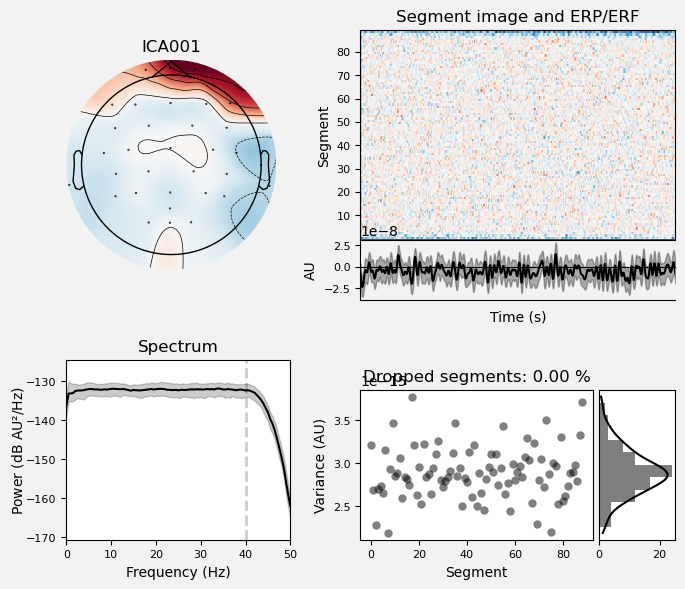

[<Figure size 700x600 with 6 Axes>]

In [60]:
ica.plot_properties(raw, picks=[1])

In [34]:
ica.exclude = [1]
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (31 components)
    Zeroing out 1 ICA component
    Projecting back using 32 PCA components


<RawArray | 32 x 178528 (178.5 s), ~43.6 MB, data loaded>

In [35]:
raw.set_eeg_reference(ref_channels='average') # 可选

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawArray | 32 x 178528 (178.5 s), ~43.6 MB, data loaded>

In [36]:
epoch_duration = 2  # seconds
events = mne.make_fixed_length_events(raw, duration=epoch_duration)
epochs = mne.Epochs(raw, events, tmin=0, tmax=epoch_duration - 1/raw.info['sfreq'], baseline=None, preload=True)
print(epochs)

Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 89 events and 2000 original time points ...
0 bad epochs dropped


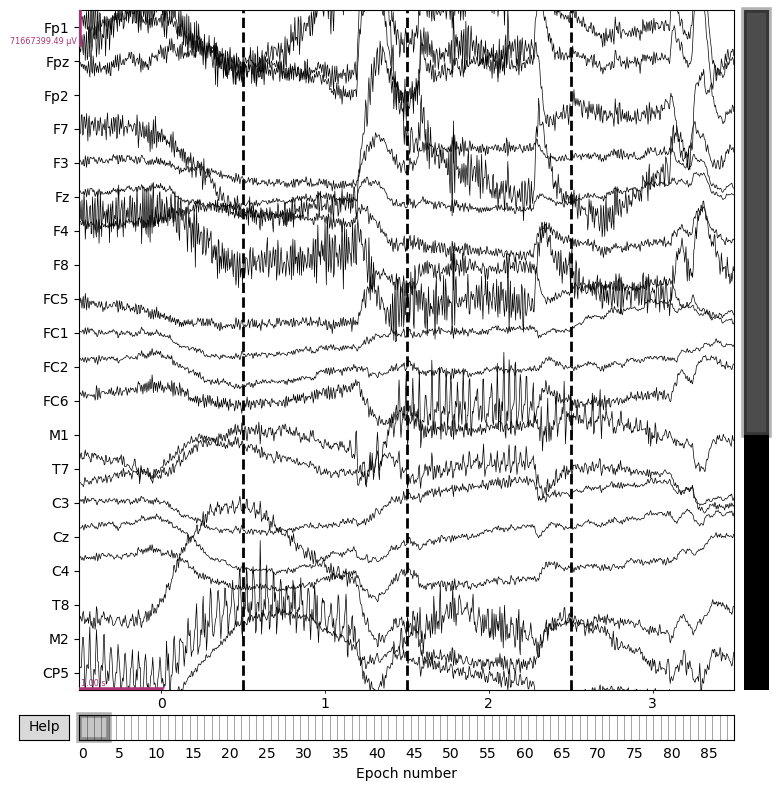

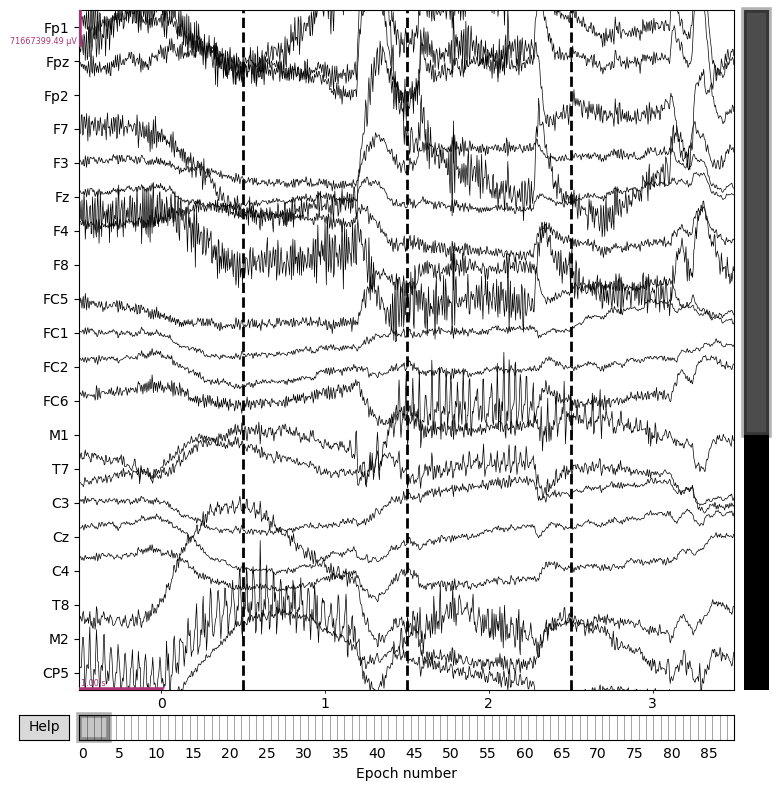

In [40]:
epochs.plot(n_epochs=4,scalings='auto')

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


C:\Users\57139\AppData\Local\Temp\ipykernel_30248\1128343329.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.compute_psd().plot(picks='eeg')
D:\anaconda3\lib\site-packages\mne\viz\utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


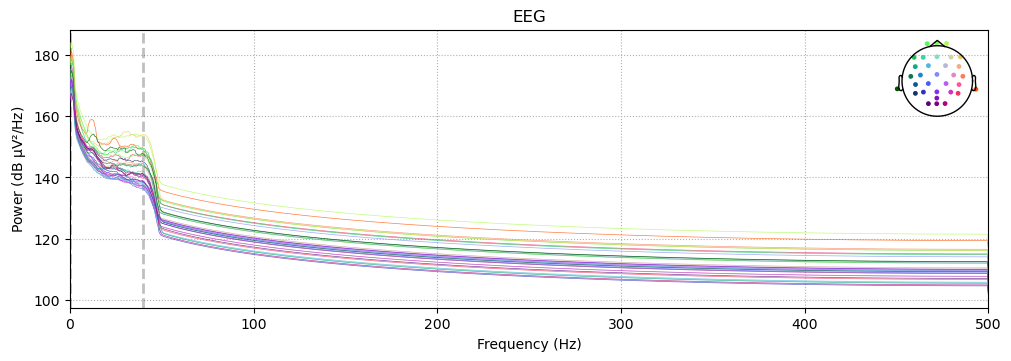

In [44]:
epochs.compute_psd().plot(picks='eeg')

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows
converting legacy list-of-tuples input to a dict for the `bands` parameter


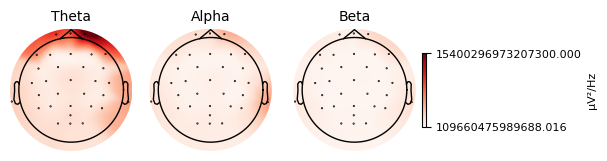

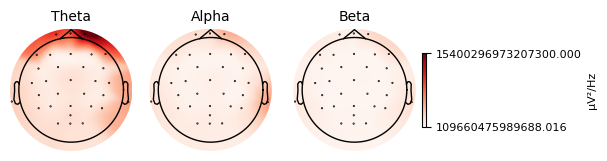

In [47]:
bands = [(4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta')]
epochs.plot_psd_topomap(bands=bands, vlim='joint')